# Segnet Training and Test

In [9]:
from models_files.segnet_import import Segnet
import numpy as np
import h5py
from utils.training_utils import get_data_flat
from utils.metrics import dice_coef
import tensorflow as tf

In [4]:
train_energies = np.arange(2, 42, 2)
train_energies = np.append(train_energies, [0.1])

direct = 'simulations/single_hits/'
num_runs = 500

train_images = get_data_flat(direct, train_energies, num_runs, 'images')
train_labels = get_data_flat(direct, train_energies, num_runs, 'labels')
print(train_images.shape)
print(train_labels.shape)

(336000, 32, 32, 1)
(336000, 32, 32, 1)


In [3]:
# val_energies = [13, 18]
# val_images = get_data_pickle('simulations_pickle\\', 10, val_energies, 'data')
# val_labels = get_data_pickle('simulations_pickle\\', 10, val_energies, 'labels')
# print(val_images.shape)
# print(val_labels.shape)

(600, 32, 32, 1)
(600, 32, 32, 1)


In [5]:
random_mask = np.arange(train_images.shape[0])
np.random.shuffle(random_mask)

In [6]:
train_images = train_images[random_mask]
train_labels = train_labels[random_mask]

In [7]:
img_width, img_height, img_channels = 32, 32, 1

model = Segnet(img_width, img_height, img_channels)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 16, 16, 128)       512   

In [10]:
img_width, img_height, img_channels = 32, 32, 1

model = Segnet(img_width, img_height, img_channels)

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), 
              loss='binary_crossentropy', 
              metrics = [dice_coef])

# checkpoint
filepath = "models_saved/segnet/segnet_trial1-gpu-ep{epoch:02d}-dice{val_dice_coef:.2f}.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_dice_coef', verbose=1, save_best_only=True, mode='max')
csv_logger = tf.keras.callbacks.CSVLogger("models_history/unet_history_log.csv", append=True)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_dice_coef', min_delta=0.0, patience=3, verbose=1, mode='max')
callbacks_list = [checkpoint, earlystop, csv_logger]

In [12]:
history = model.fit(train_images, train_labels, 
          batch_size=32, 
          epochs=10,
          validation_split=0.2,
          shuffle=False,
          callbacks=callbacks_list
         )

Train on 268800 samples, validate on 67200 samples
Epoch 1/10
   160/268800 [..............................] - ETA: 2:06:05 - loss: 1.4811 - dice_coef: 0.1000

KeyboardInterrupt: 

# DONE- TRAINING TILL HERE

# PLOTS

## Training/validation loss

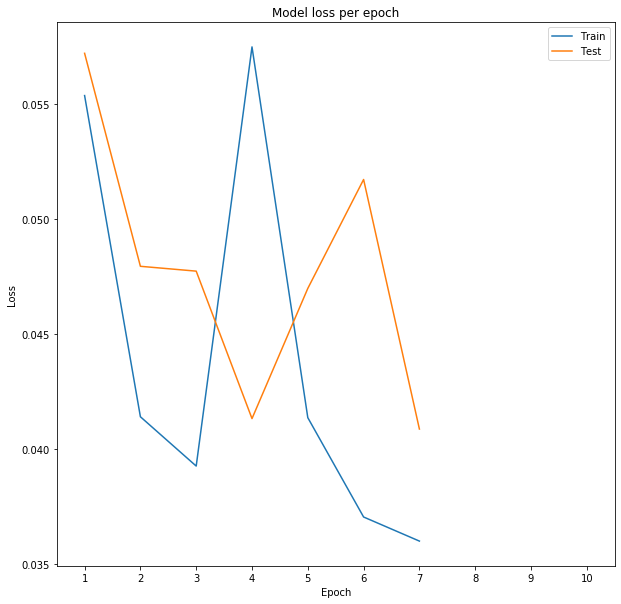

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation loss values
plt.figure(figsize=(10,10))
plt.plot(range(1,8), history.history['loss'])
plt.plot(range(1,8), history.history['val_loss'])
plt.title('Model loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim((0.5,10.5))
plt.xticks(range(1,11,1))
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# LMAO No